In [28]:
# Bscs20031
# Muhammad Taqi Raza
# Assignment no 1
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
sigma=2
name="GCU.webp"
#ctscan, xray, shapessm, circle, mecca06, LahoreFort
def QuantizedCannyEdgeDetector(Direction,magnitude):
        
    direction=np.array(Direction)
    Matrix=np.array(magnitude)
    direction= AssignTheDirection(direction)

    colormap = {
        0: (200, 0, 200),   # Pink
        1: (0, 255, 0),   # Green
        2: (190, 140, 100),   # Skin
        3: (0, 0, 255)  # Red
    }

    height, width = direction.shape
    color_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Map the pixel values to colors using the colormap
    for value, color in colormap.items():
        condition1 = (direction == value)
        condition2 = (Matrix != 0)
        combined_condition = condition1 & condition2
        color_image[combined_condition] = color

    print("Quantized Canny Edge Detector")
    plt.imshow(color_image)
    plt.savefig('Results/'+name+'_canny_'+str(sigma)+'.jpg')

    plt.show()
    print(color_image.shape)
    
def ReturnNeighborsPosition(direction,row,col):
    if(direction[row][col]==0):
        # Horizontal -- row col+1 , row col-1
        return(row,col+1,row,col-1)
    elif(direction[row][col]==1):
        # Diagonal / row+1 col+1 , row-1 col-1
        return(row+1,col+1,row-1,col-1)
    elif(direction[row][col]==2):
        # Vertical / row+1 col , row-1 col
        return(row+1,col,row-1,col)
    elif(direction[row][col]==3):
        # Main diagonal \ row+1 col-1 , row-1 col+1
        return(row+1,col-1,row-1,col+1)
    return (0,0)

def StrongPixel(StrongPixelsInTheImage,i,c):
    return (StrongPixelsInTheImage[i][c]!=0)
def WeakPixel(Pixel,Th,Tl):
    if(Pixel<Th and Pixel>Tl):
        return True
    return False

def calculate_filter_size(sigma,T):
  sHalf=round(math.sqrt(-math.log(T)*2*(sigma**2)))
  return sHalf

def Gaussian(x,y,sigma):
  return np.exp(-((x**2)+(y**2))/(2*(sigma**2)))

def GaussianDerivative(x,y,sigma,WithRespectTo,scale_factor):
  return np.round(scale_factor*(-1*WithRespectTo/(sigma**2))*Gaussian(x,y,sigma))

def calculate_gradient(x,y,sigma,scale_factor):
  return np.array([GaussianDerivative(x,y,sigma,x,scale_factor),GaussianDerivative(x,y,sigma,y,scale_factor)])

def convolution2D(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    h_half, w_half = k_height // 2, k_width // 2
    result = np.zeros((height, width), dtype=np.float32)
    for i in range(h_half, height - h_half):
        for j in range(w_half, width - w_half):
            Sub_window = image[i - h_half:i + h_half + 1, j - w_half:j + w_half + 1]
            result[i, j] = np.sum(Sub_window * kernel)
    return result

def ReturnNeighbors(direction,Magnitude,row,col):
    if(direction[row][col]==0):
        # Horizontal -- row col+1 , row col-1
        return(Magnitude[row][col+1],Magnitude[row][col-1])
    elif(direction[row][col]==1):
        # Diagonal / row+1 col+1 , row-1 col-1
        return(Magnitude[row+1][col+1],Magnitude[row-1][col-1])
    elif(direction[row][col]==2):
        # Vertical / row+1 col , row-1 col
        return(Magnitude[row+1][col],Magnitude[row-1][col])
    elif(direction[row][col]==3):
        # Main diagonal \ row+1 col-1 , row-1 col+1
        return(Magnitude[row+1][col-1],Magnitude[row-1][col+1])
    return (0,0)
def ReadTheImage(ImageName):
   return cv2.imread(ImageName)
def ConvertToGrayScale(image):
   return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
def Filters(sigma,T):   
  sHalf=calculate_filter_size(sigma,T)
  return np.meshgrid(np.arange(-sHalf,sHalf+1, dtype=float),np.arange(-sHalf,sHalf+1, dtype=float))

def ConvolutionWithRespectToGradients(image,gx,gy):
  return (convolution2D(image,gx),convolution2D(image,gy))
  
def PrintImage(image):
  plt.imshow(image,cmap="gray")
  plt.show()

def MagnitudeGradient(fx,fy,scale_factor):
  gradientMagnitude=np.sqrt((fy**2)+(fx**2))/255
  normalized_MagnitudeGradient = 255 * (gradientMagnitude - gradientMagnitude.min()) / (gradientMagnitude.max() - gradientMagnitude.min())
  normalized_matrix = normalized_MagnitudeGradient.astype(np.uint8)
  return normalized_MagnitudeGradient

def PlotHistogram(matrix):
    flat_matrix = matrix.flatten()
    non_zero_values = flat_matrix[flat_matrix != 0]
    hist, bins = np.histogram(non_zero_values, bins=np.arange(1, 257))
    plt.bar(bins[:-1], hist, width=1, align='edge')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Value Frequency in 2D Matrix')
    plt.show()

def ScatterPlot(fy,fx,direction):
    fy_over_fx = fy / fx
    plt.scatter(direction, fy_over_fx, label='Direction vs. fy/fx')
    plt.xlabel('fy/fx')
    plt.ylabel('Direction (degrees)')
    plt.legend()
    plt.show()
# Can be called before direction assigned 

def QuantizedImage(Direction,magnitude):
  direction=np.array(Direction)
  Magnitude=np.array(magnitude)

  for i in range(len(direction)):
    for c in range(len(direction[i])):
      if(Magnitude[i][c]>50):
        if((direction[i][c]>=0 and direction[i][c]<22.5)or(direction[i][c]>157.5 and direction[i][c]<202.5)or(direction[i][c]>337.5 and direction[i][c]<=360)):
          direction[i][c]=0 # Horizontal -- row col+1 , row col-1 
        elif((direction[i][c]>=22.5 and direction[i][c]<=67.5)or(direction[i][c]>=202.5 and direction[i][c]<=247.5)):
          direction[i][c]=1 # Diagonal / row+1 col+1 , row-1 col-1
        elif((direction[i][c]>=67.5 and direction[i][c]<=112.5)or(direction[i][c]>=247.5 and direction[i][c]<=292.5)):
          direction[i][c]=2 # Vertical / row+1 col , row-1 col
        elif((direction[i][c]>=112.5 and direction[i][c]<=157.5)or(direction[i][c]>=292.5 and direction[i][c]<=337.5)):
          direction[i][c]=3 # Main diagonal \ row+1 col-1 , row-1 col+1
  colormap = {
      0: (200, 0, 200),   # Pink
      1: (0, 255, 0),   # Green
      2: (190, 140, 100),   # Skin
      3: (0, 0, 255)  # Red
  }
  # Initialize an empty color image with the same dimensions
  height, width = direction.shape
  color_image = np.zeros((height, width, 3), dtype=np.uint8)
  # Map the pixel values to colors using the colormap
  for value, color in colormap.items():
      color_image[direction == value] = color
  # Display or save the color image
  print("QuantizedImage")
  plt.imshow(color_image)
  plt.savefig('Results/'+name+'_quantized_'+str(sigma)+'.jpg')

  plt.show()

def AssignTheDirection(Direction):
  direction=np.array(Direction)
  for i in range(len(direction)):
    for c in range(len(direction[i])):
      if((direction[i][c]>=0 and direction[i][c]<22.5)or(direction[i][c]>157.5 and direction[i][c]<202.5)or(direction[i][c]>337.5 and direction[i][c]<=360)):
        direction[i][c]=0 # Horizontal -- row col+1 , row col-1 
      elif((direction[i][c]>=22.5 and direction[i][c]<=67.5)or(direction[i][c]>=202.5 and direction[i][c]<=247.5)):
        direction[i][c]=1 # Diagonal / row+1 col+1 , row-1 col-1
      elif((direction[i][c]>=67.5 and direction[i][c]<=112.5)or(direction[i][c]>=247.5 and direction[i][c]<=292.5)):
        direction[i][c]=2 # Vertical / row+1 col , row-1 col
      elif((direction[i][c]>=112.5 and direction[i][c]<=157.5)or(direction[i][c]>=292.5 and direction[i][c]<=337.5)):
        direction[i][c]=3 # Main diagonal \ row+1 col-1 , row-1 col+1
  return direction

def NonMaximumSupression(Direction,magnitude):
  direction=np.array(Direction)
  Magnitude=np.array(magnitude)

  direction=AssignTheDirection(direction)
  NonMaximumSupression=np.array(Magnitude)
  for i in range(1,len(direction)-1):
      for c in range(1,len(direction[i])-1):
          First,Second=ReturnNeighbors(direction,NonMaximumSupression,i,c)
          if(((First<NonMaximumSupression[i][c]) and (Second<NonMaximumSupression[i][c]))==False):
              NonMaximumSupression[i][c]=0
  
  return NonMaximumSupression

  
def HysterisisThreshold(Th,Tl,NonMaximumSupressionMatrix,Direction):
  direction=np.array(Direction)
  nonMaximumSupressionMatrix=np.array(NonMaximumSupressionMatrix)

  direction=AssignTheDirection(direction)
  
  StrongPixelsInTheImage=np.array(nonMaximumSupressionMatrix)
  StrongPixelsInTheImage[StrongPixelsInTheImage<Th]=0
  StrongPixelsInTheImage[StrongPixelsInTheImage>Th]=255

  Temp=np.array(nonMaximumSupressionMatrix)
  Visited = np.zeros(nonMaximumSupressionMatrix.shape, dtype=bool)

  for i in range(1,len(Temp)-1):
      for c in range(1,len(Temp[i])-1):
          if(StrongPixel(StrongPixelsInTheImage,i,c)):
              N1_row,N1_col,N2_row,N2_col=ReturnNeighborsPosition(direction,i,c)
              if(Visited[N1_row][N1_col]==False and WeakPixel(Temp[N1_row][N1_col],Th,Tl)):
                  StrongPixelsInTheImage[N1_row][N1_col]=255 # also a strong pixel
                  Visited[N1_row][N1_col]=True
              if(Visited[N2_row][N2_col]==False and WeakPixel(Temp[N2_row][N2_col],Th,Tl) ):
                  StrongPixelsInTheImage[N2_row][N2_col]=255 # also a strong pixel
                  Visited[N2_row][N2_col]==True
  
  return StrongPixelsInTheImage
    



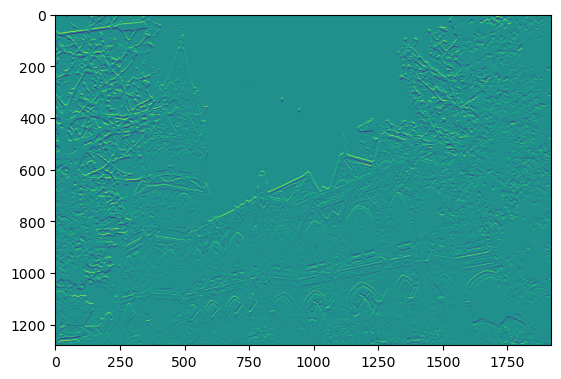

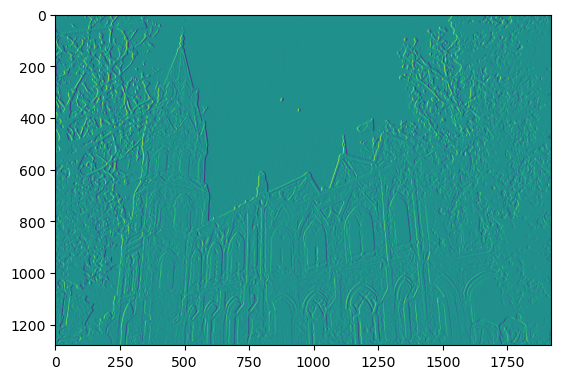

In [29]:

if __name__=="__main__":
  T=0.5

  scale_factor=255
  RGB_image = ReadTheImage(name)

  image = ConvertToGrayScale(RGB_image)
  [Y,X] = Filters(sigma,T)
  gx,gy=calculate_gradient(X,Y,sigma,scale_factor)
  fx,fy=ConvolutionWithRespectToGradients(image,gx,gy)
  
  plt.imshow(fx)
  plt.savefig('Results/'+name+'_fx_'+str(sigma)+'.jpg')

  plt.show()

  plt.imshow(fy)
  plt.savefig('Results/'+name+'_fy_'+str(sigma)+'.jpg')
  
  plt.show()


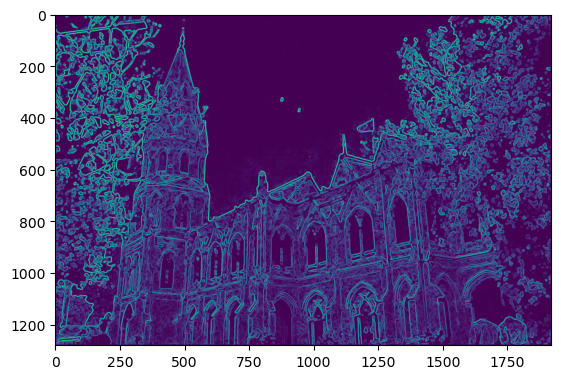

QuantizedImage


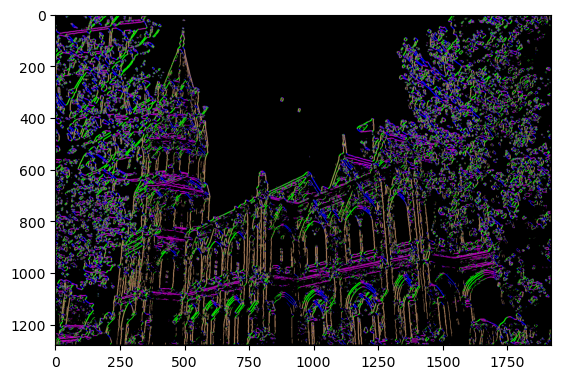

Quantized Canny Edge Detector


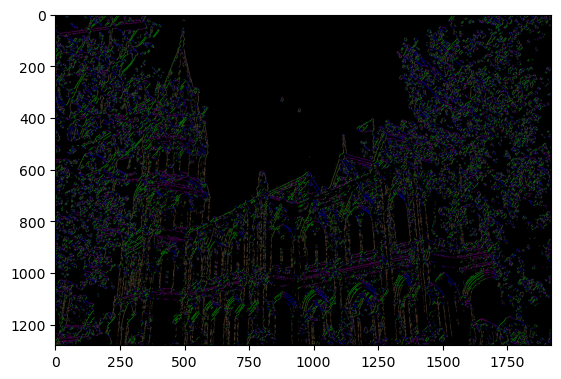

(1280, 1920, 3)


In [30]:

gradientMagnitude=MagnitudeGradient(fx,fy,scale_factor)
plt.imshow(gradientMagnitude)
plt.savefig('Results/'+name+'_magnitude_'+str(sigma)+'.jpg')
plt.show()

# PlotHistogram(gradientMagnitude)
# Calculate direction in degrees
gradient_direction = np.arctan2(fy, fx)
gradient_direction = np.degrees(gradient_direction)+180
# ScatterPlot(fy,fx,gradient_direction)
QuantizedImage(gradient_direction,gradientMagnitude)
nonMaximumSupressionMatrix=NonMaximumSupression(gradient_direction,gradientMagnitude)
Tl=10
Th=50
Edges=HysterisisThreshold(Th,Tl,nonMaximumSupressionMatrix,gradient_direction)
QuantizedCannyEdgeDetector(gradient_direction,Edges)